In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyaxions import jaxions as pa
from pyaxions import randomstrings  as rs
import importlib

import matplotlib as mpl
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 16
mpl.rcParams['text.usetex'] = True

In [64]:
importlib.reload(rs)

<module 'pyaxions.randomstrings' from '/Users/madomaxo/Salsa/jaxions/jaxions/scripts/pyaxions/randomstrings.py'>

# Basic string

In [46]:
# help(rs.onestring)

In [77]:
N = 128
x,y,z,e = rs.onestring(N, 25, n=4, m='s', ar=0, xcf=0.5, ycf=0.5, zcf=0.5, dz=-0.5)

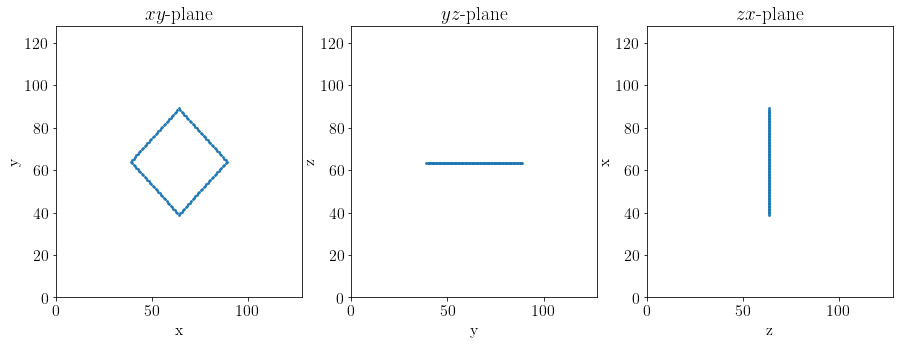

In [78]:
fig,ax=plt.subplots(1,3,figsize=(15,5))

ax[0].scatter(x,y,s=3)
ax[0].title.set_text(r'$xy$-plane')
ax[0].set_xlabel('x'); ax[0].set_ylabel('y')

ax[1].scatter(y,z,s=3)
ax[1].title.set_text(r'$yz$-plane')
ax[1].set_xlabel('y'); ax[1].set_ylabel('z')

ax[2].scatter(z,x,s=3)
ax[2].title.set_text(r'$zx$-plane')
ax[2].set_xlabel('z'); ax[2].set_ylabel('x')

for a in ax:
    a.set_ylim(0,N); a.set_xlim(0,N)

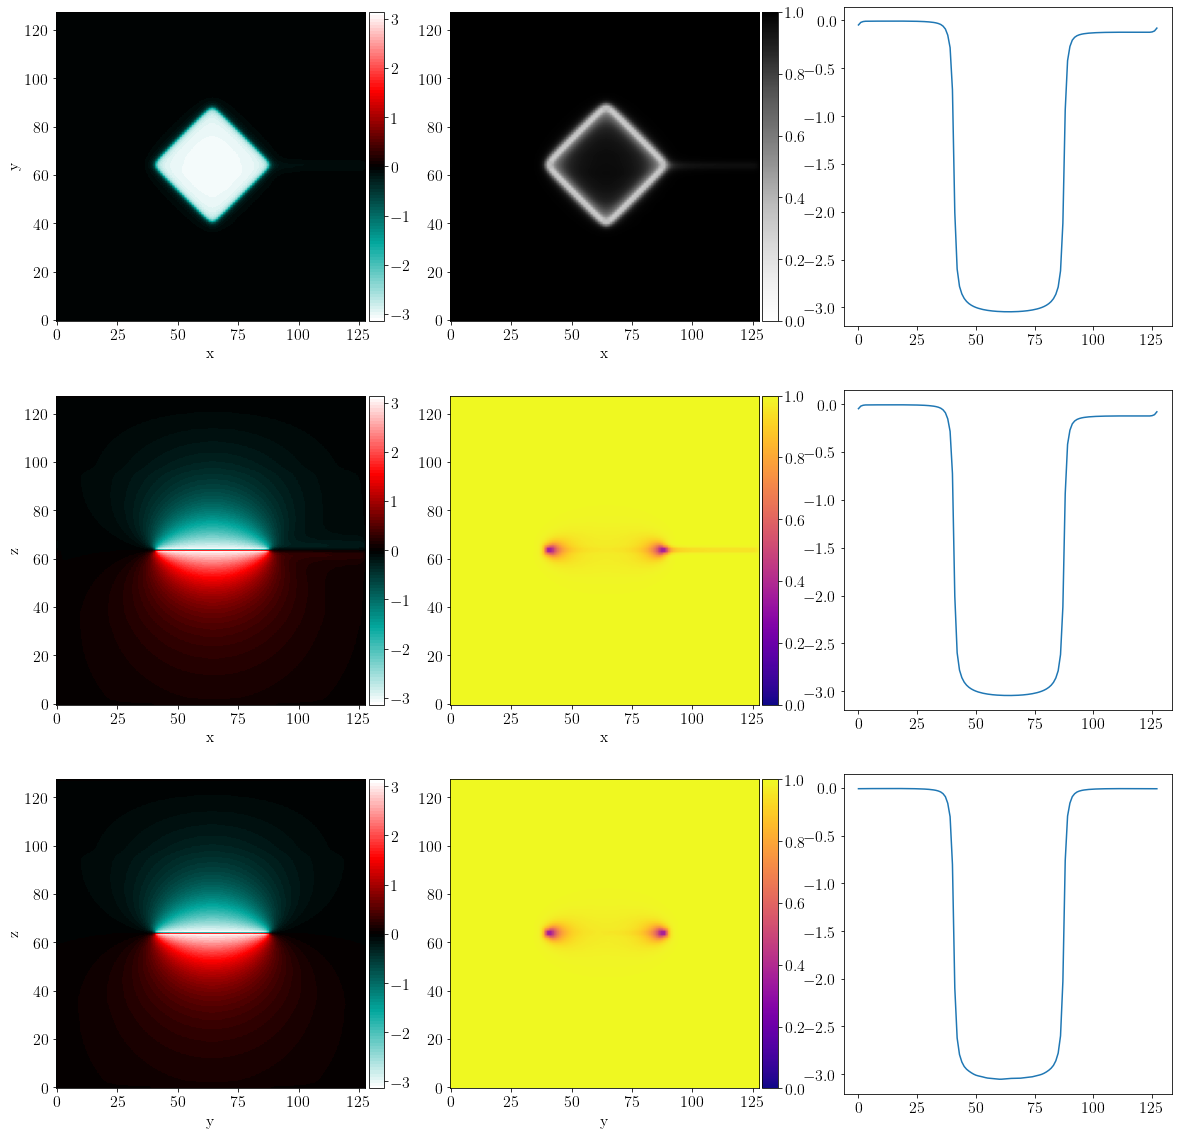

In [79]:
rs.fu(f,64,64,64)

# Do it yourself 2 strings

In [117]:
N = 128
x,y,z,e = rs.onestring(N, 50, n=4, m='l', ar=0, xcf=0.5, ycf=0.5, zcf=0.5, dz=-0.5)

In [118]:
# x2,y2,z2,e2
x2 = np.concatenate((x,x))
y2 = np.concatenate((y,y))
z2 = np.concatenate((z,z))
e2 = np.concatenate((e,e))

In [119]:
xy = np.column_stack((x2, y2, z2, e2))
np.savetxt('./string.dat', xy, delimiter=' ', fmt='%.2f %.2f %.2f %d')   # X is an array

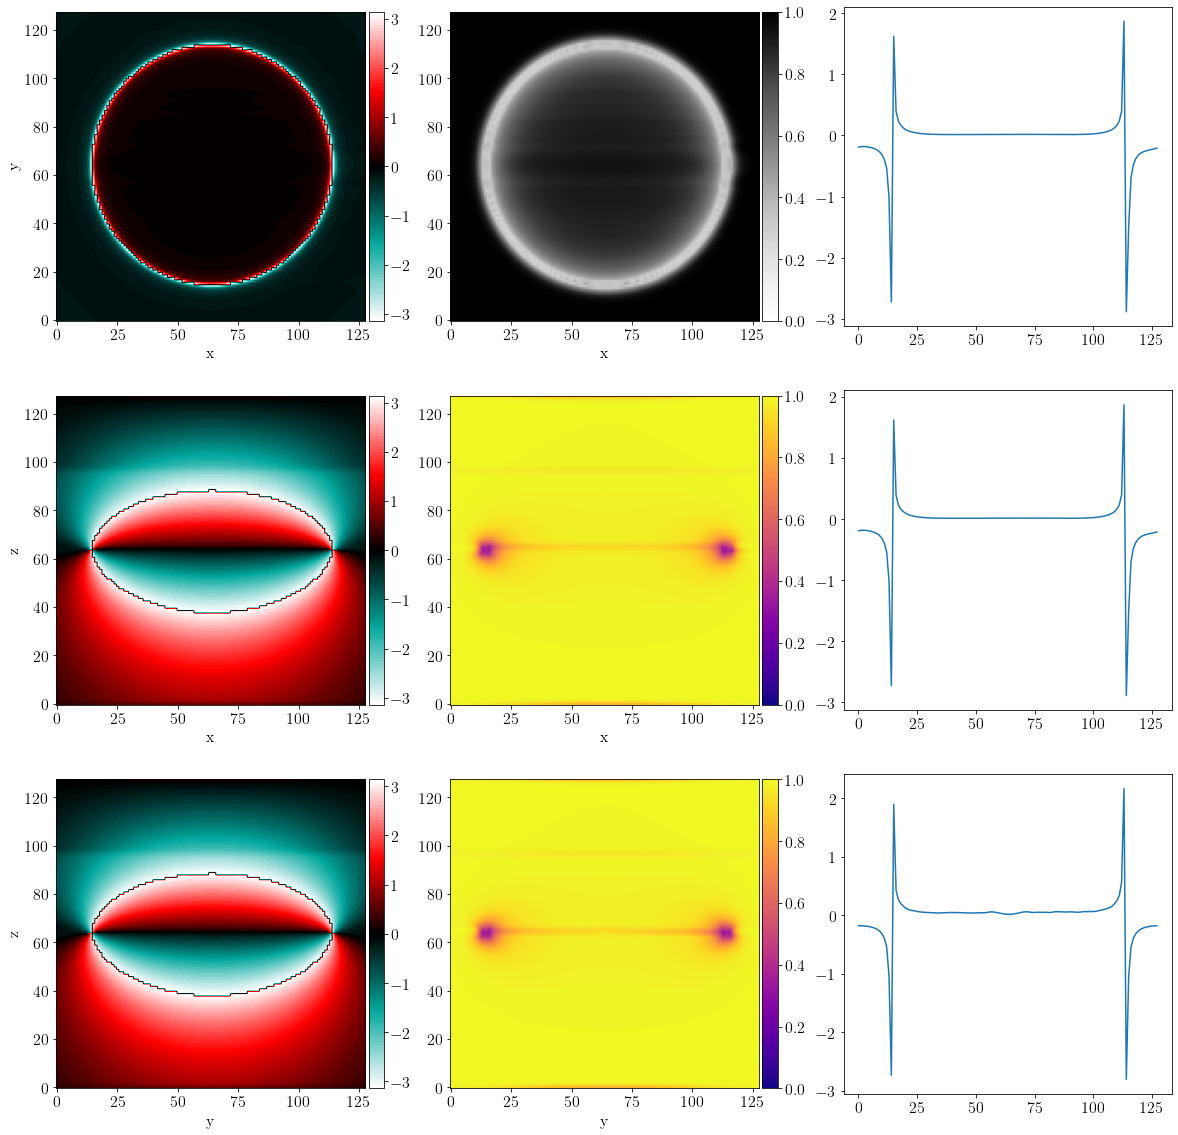

In [120]:
rs.fu(f,64,64,64)

# Random strings

Now we have access to the function "randomstrings" and can call it directly for every combination of parameters we want.

In [12]:
N = 128
LEN = 350

#One random string centered in the simulation volume and not really fancy shaped (ITER is "small")
x, y, z, = rs.randomstrings(N = N, LEN = LEN, NSTRINGS = 1, ITER = 1, XCF = 0.5, YCF = 0.5, ZCF = 0.5, PATH = './')

fail


We can visualize the result with matplotlib by plotting the coordinates in the three coordinate planes:

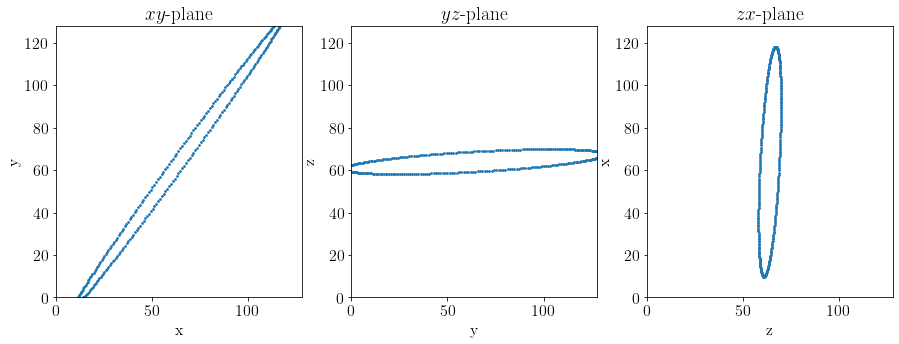

In [13]:
fig,ax=plt.subplots(1,3,figsize=(15,5))

ax[0].scatter(x,y,s=3)
ax[0].title.set_text(r'$xy$-plane')
ax[0].set_xlabel('x'); ax[0].set_ylabel('y')

ax[1].scatter(y,z,s=3)
ax[1].title.set_text(r'$yz$-plane')
ax[1].set_xlabel('y'); ax[1].set_ylabel('z')

ax[2].scatter(z,x,s=3)
ax[2].title.set_text(r'$zx$-plane')
ax[2].set_xlabel('z'); ax[2].set_ylabel('x')

for a in ax:
    a.set_ylim(0,N); a.set_xlim(0,N)

The resulting data file string.dat (which you should find either in the same directory as this notebook or at the directory you specified in PATH) stores the ($x$,$y$,$z$)-coordinates of the string(s) and a fourth column of int values $0$ or $1$, where a 1 is saved for the endpoint of an individual string. This information is needed to avoid the overcounting of segments that connect two distinct strings in the computation of the $\theta$-field of the configuration which is directly handled by Jaxions.

A bit more complex situation with multiple strings and funnier shapes: 

In [24]:
x, y, z, = rs.randomstrings(N = N, LEN = 100, NSTRINGS = 4, ITER = 2)

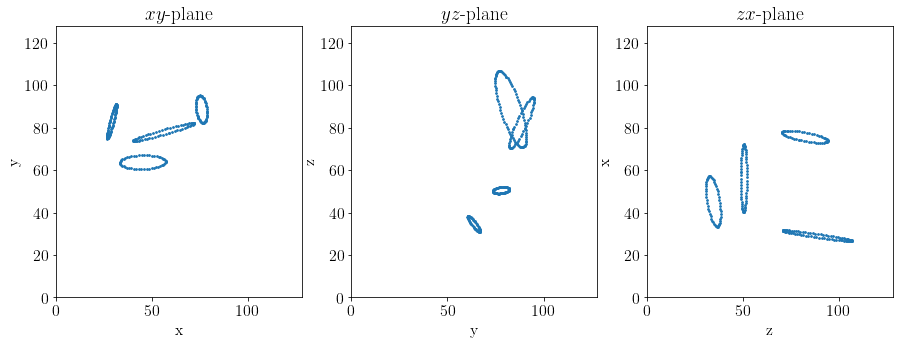

In [25]:
fig,ax=plt.subplots(1,3,figsize=(15,5))

ax[0].scatter(x,y,s=3)
ax[0].title.set_text(r'$xy$-plane')
ax[0].set_xlabel('x'); ax[0].set_ylabel('y')

ax[1].scatter(y,z,s=3)
ax[1].title.set_text(r'$yz$-plane')
ax[1].set_xlabel('y'); ax[1].set_ylabel('z')

ax[2].scatter(z,x,s=3)
ax[2].title.set_text(r'$zx$-plane')
ax[2].set_xlabel('z'); ax[2].set_ylabel('x')

for a in ax:
    a.set_ylim(0,N); a.set_xlim(0,N)

Help on function onestring in module pyaxions.randomstrings:

onestring(N, R, n=4, m='l', ar=0, xcf=0.5, ycf=0.5, zcf=0.5, dz=-0.5)
    Creates a string.dat file with the coordinates of a :
        string loop (m='l')
        polyhedra of n vertices (m='s')
        knot (m='k')
    centered at N*xcf, N*ycf, N*zcf+dz
    
    N  : number of grid points to be used in the simulation, which helps in
         specifying the number of poins ~ O(1) per grid cube
    R  : Radius
    ar : angle of rotation around z axis, if desired



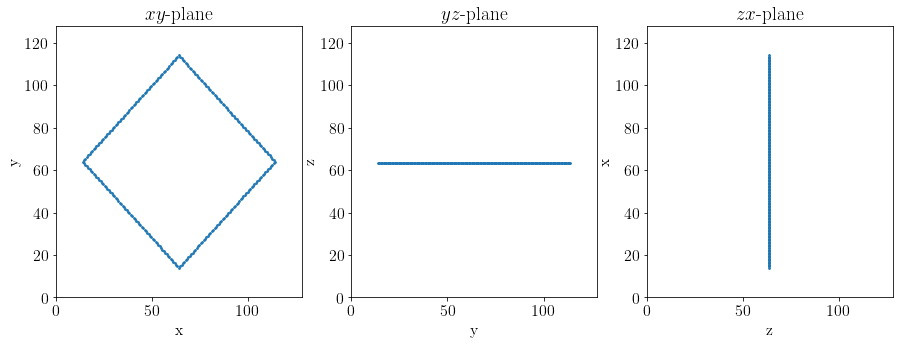